In [2]:
import numpy as np
import matplotlib.pyplot as plt
from read_file import *

In [3]:
def harvesting_phases(trial):
        dif = []
        for i,value in enumerate(trial):
            if i > 0:
                dif.append(value - trial[i-1])
        pulling = [dif.index(max(dif))-1, dif.index(min(dif))+1]
        release = [pulling[1], pulling[1]*2 - pulling[0]]
        return pulling, release

In [4]:
def process_data(harvest_data, pulling_force, ref_loadcell, ref_pressure, phase):
        pull_ref, release_ref = harvesting_phases(ref_loadcell)
        reference1 = np.array(ref_pressure[pull_ref[0]:pull_ref[1]])       # Pulling phase
        reference2 = np.array(ref_pressure[release_ref[0]:release_ref[1]]) # Release Phase

        pull, release = harvesting_phases(pulling_force)
        pull_data = np.array(harvest_data[pull[0]:pull[1]])               # Pulling phase
        release_data = np.array(harvest_data[release[0]:release[1]])      # Release Phase

        harvest_ref = []
        new_data = []

        if phase == 1:   # Pulling phase
            delta_i = np.abs(reference1.shape[0]-pull_data.shape[0]) 
            if reference1.shape[0] < pull_data.shape[0]:
                begin = pull_ref[0]-delta_i
                if begin < 0:
                    begin = 0
                harvest_ref = np.append(ref_pressure[begin:pull_ref[0]], reference1)
                new_data = pull_data[0:harvest_ref.shape[0]]
                
            elif reference1.shape[0] > pull_data.shape[0]:
                begin = pull[0]-delta_i
                if begin < 0:
                    begin = 0
                new_data = np.append(harvest_data[begin:pull[0]], pull_data)
                harvest_ref = reference1[0:new_data.shape[0]]
        
        elif phase == 2: # Release Phase
            delta_i = np.abs(reference2.shape[0]-release_data.shape[0]) 
            if reference2.shape[0] < release_data.shape[0]:
                end = release_ref[1]+delta_i+1
                if end > len(harvest_ref):
                    end = len(harvest_ref)
                harvest_ref = np.append(harvest_ref[release_ref[1]+1:end], harvest_ref)
                new_data = release_data[0:harvest_ref.shape[0]]
                
            elif reference2.shape[0] > release_data.shape[0]:
                end = release[1]+delta_i+1
                if end > len(harvest_data):
                    end = len(harvest_data)
                new_data = np.append(harvest_data[release[1]+1:end], new_data)
                harvest_ref = reference2[0:new_data.shape[0]]
        return new_data, harvest_ref

In [5]:
def get_reference(filename):
    harvest_ref = []
    rows = []
    # reading csv file
    with open(filename, 'r') as csvfile:
        # creating a csv reader object
        csvreader = csv.reader(csvfile)

        # extracting each data row one by one
        for row in csvreader:
            rows.append(row)

    harvest_ref = [float(x) for x in rows[0]]
    return np.array(harvest_ref)

In [6]:
filename = [0]*6
filename[0] = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Training Results/20220626/Training Parametres_1gWBendy.txt'
filename[1] = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Training Results/20220626/Training Parametres_1gWOBendy.txt'
filename[2] = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Training Results/20220626/Training Parametres_4gWBendy.txt'
filename[3] = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Training Results/20220626/Training Parametres_4gWOBendy.txt'
filename[4] = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Training Results/20220626/Training Parametres_7gWBendy.txt'
filename[5] = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Training Results/20220626/Training Parametres_7gWOBendy.txt'

find_loss = ['Pulling loss = ', 'Release loss = ']
find_error = ['Pulling force relative error = ', 'Release force relative error = ']
find_dif = ['Pulling difference = ', 'Release difference = ']
find_fd = 'Fd = ['
find_pressure = 'Raspberry Reading = ['
find_pull_grip = 'Pulling Gripper = ['
find_pull = 'Pulling Force = ['
find_time = 'Time vector = ['
fail = 'PICKING FAILED'

ref_l = [0]*6
ref_p = [0]*6

ref_l[0] = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_loadcell_1gWBendy.csv"
ref_p[0] = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_raspberry_1gWBendy.csv"

ref_l[1] = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_loadcell_1gWOBendy.csv"
ref_p[1] = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_raspberry_1gWOBendy.csv"

ref_l[2]= "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_loadcell_4gWBendy.csv"
ref_p[2] = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_raspberry_4gWBendy.csv"

ref_l[3] = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_loadcell_4gWOBendy.csv"
ref_p[3] = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_raspberry_4gWOBendy.csv"

ref_l[4] = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_loadcell_7gWBendy.csv"
ref_p[4] = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_raspberry_7gWBendy.csv"

ref_l[5] = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_loadcell_7gWOBendy.csv"
ref_p[5] = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_raspberry_7gWOBendy.csv"

In [7]:
rows = []
ref_loadcell = []
ref_pressure = []
fail_index = []
loss = [] 
error = []
dif = []
raspberry_reading = []
pulling_force = []
time_vec = []
pulling_gripper =[]
Fd = []
for i in range(6):
    rows.append(read_csv_file(filename[i]))
    ref_loadcell.append(get_reference(ref_l[i]))
    ref_pressure.append(get_reference(ref_p[i]))
    fail_index.append(find_fails(fail, find_fd, rows[i]))
    loss.append(read_loss_error(find_loss, fail_index[i], rows[i]))
    error.append(read_loss_error(find_error, fail_index[i], rows[i]))
    dif.append(read_loss_error(find_error, fail_index[i], rows[i]))
    raspberry_reading.append(read_pressure_pulling_force(find_pressure, fail_index[i], rows[i]))
    pulling_force.append(read_pressure_pulling_force(find_pull, fail_index[i], rows[i]))
    time_vec.append(read_pressure_pulling_force(find_time, fail_index[i], rows[i]))
    pulling_gripper.append(read_pressure_pulling_force(find_pull_grip, fail_index[i], rows[i]))
    Fd.append(read_Fd(find_fd, fail_index[i], rows[i]))

In [23]:
pulling_ref = [0]*6
release_ref = [0]*6
for i in range(6):
    pulling_ref[i], release_ref[i] = harvesting_phases(ref_loadcell[i])

In [ ]:
margin = 0
pulling = [0]*6
release = [0]*6
for j in range(6):
    pulling[j] = [0]*len(raspberry_reading[j])
    release[j] = [0]*len(raspberry_reading[j])
    for i in range(len(raspberry_reading[j])):
        pulling[j][i], release[j][i] = harvesting_phases(pulling_force[j][i])

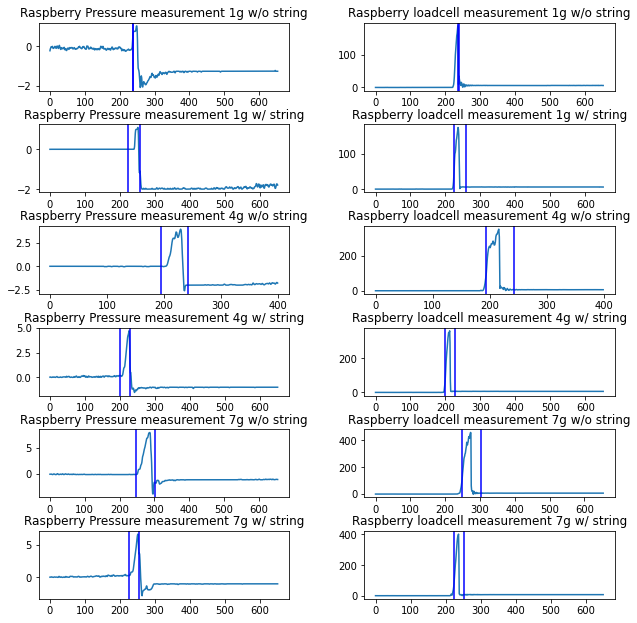

In [58]:
# References
margin = 0
fig, axs = plt.subplots(6, 2)
fig.set_size_inches(10,10)

titles = [['Raspberry Pressure measurement 1g w/o string','Raspberry loadcell measurement 1g w/o string'],
          ['Raspberry Pressure measurement 1g w/ string','Raspberry loadcell measurement 1g w/ string'],
          ['Raspberry Pressure measurement 4g w/o string','Raspberry loadcell measurement 4g w/o string'],
          ['Raspberry Pressure measurement 4g w/ string','Raspberry loadcell measurement 4g w/ string'],
          ['Raspberry Pressure measurement 7g w/o string','Raspberry loadcell measurement 7g w/o string'],
          ['Raspberry Pressure measurement 7g w/ string','Raspberry loadcell measurement 7g w/ string']]

i = 0
for j in range(6):
    axs[j][i].plot(range(ref_pressure[j].shape[0]), ref_pressure[j])
    axs[j][i].axvline(x = pulling_ref[j][0]-margin, color = 'b', label = 'axvline - full height')
    axs[j][i].axvline(x = release_ref[j][1]+margin, color = 'b', label = 'axvline - full height')
    axs[j][i].set_title(titles[j][0])

i = 1
for j in range(6):
    axs[j][i].plot(range(ref_loadcell[j].shape[0]), ref_loadcell[j])
    axs[j][i].axvline(x = pulling_ref[j][0]-margin, color = 'b', label = 'axvline - full height')
    axs[j][i].axvline(x = release_ref[j][1]+margin, color = 'b', label = 'axvline - full height')
    axs[j][i].set_title(titles[j][1])

plt.subplots_adjust(left=0.1,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.9, 
                            wspace=0.3, 
                            hspace=0.5
                            )

# for ax in fig.get_axes():
#     ax.label_outer()

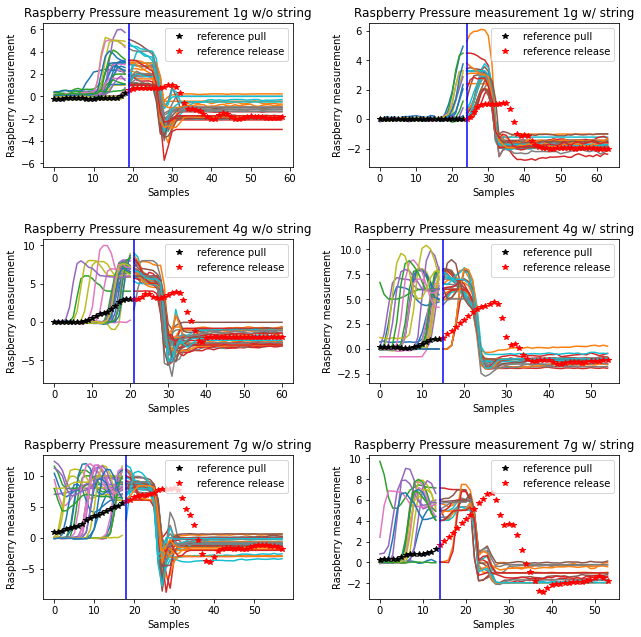

In [67]:
fig, axs = plt.subplots(3,2)
fig.set_size_inches(10,10)
k = 0
indx = [0, 1]
while k < 3:
    for j in indx:
        shortest1 = np.min(np.array(pulling[j]), axis=0)[1]
        shortest2 = 40
        for i in range(len(raspberry_reading[j])):
            l1 = len(raspberry_reading[j][i][pulling[j][i][1]-shortest1:pulling[j][i][1]])
            l2 = l1+len(raspberry_reading[j][i][release[j][i][0]:release[j][i][0]+shortest2])
            axs[k][j-indx[0]].plot(range(l1), raspberry_reading[j][i][pulling[j][i][1]-shortest1:pulling[j][i][1]])
            axs[k][j-indx[0]].plot(range(l1,l2), raspberry_reading[j][i][release[j][i][0]:release[j][i][0]+shortest2])
        rl1 = len(ref_pressure[j][pulling_ref[j][1]-shortest1:pulling_ref[j][1]])
        rl2 = rl1+len(ref_pressure[j][release_ref[j][0]:release_ref[j][0]+shortest2])
        axs[k][j-indx[0]].plot(range(rl1), ref_pressure[j][pulling_ref[j][1]-shortest1:pulling_ref[j][1]], 'k*',label='reference pull')
        axs[k][j-indx[0]].plot(range(rl1,rl2), ref_pressure[j][release_ref[j][0]:release_ref[j][0]+shortest2], 'r*',label='reference release')
        axs[k][j-indx[0]].legend(loc="upper right")
        axs[k][j-indx[0]].set_xlabel("Samples")
        axs[k][j-indx[0]].set_ylabel("Raspberry measurement")
        axs[k][j-indx[0]].axvline(x =shortest1, color = 'b', label = 'axvline - full height')
        axs[k][j-indx[0]].set_title(titles[j][0])
    k += 1
    indx[0] = indx[0] + 2
    indx[1] = indx[1] + 2

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.5
                    )

In [69]:
new_titles = ['Raspberry 1g w/o string',
              'Raspberry 1g w/ string',
              'Raspberry 4g w/o string',
              'Raspberry 4g w/ string',
              'Raspberry 7g w/o string',
              'Raspberry 7g w/ string']

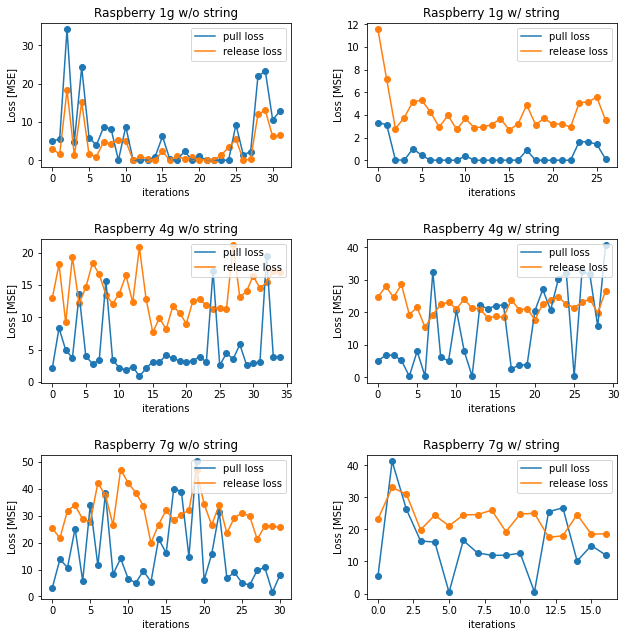

In [71]:
fig, axs = plt.subplots(3,2)
fig.set_size_inches(10,10)
k = 0
indx = [0, 1]
while k < 3:
    for j in indx:
        plot_loss0 = []
        plot_loss1 = []
        x_loss = []
        for i in range(len(loss[j])):
            plot_loss0.append(loss[j][i][0])
            plot_loss1.append(loss[j][i][1])
            x_loss.append(i)
        axs[k][j-indx[0]].scatter(x_loss, plot_loss0)
        axs[k][j-indx[0]].scatter(x_loss, plot_loss1)
        axs[k][j-indx[0]].plot(x_loss, plot_loss0,label='pull loss')
        axs[k][j-indx[0]].plot(x_loss, plot_loss1,label='release loss')
        axs[k][j-indx[0]].legend(loc="upper right")
        axs[k][j-indx[0]].set_xlabel("iterations")
        axs[k][j-indx[0]].set_ylabel("Loss [MSE]")
        axs[k][j-indx[0]].set_title(new_titles[j])
    k += 1
    indx[0] = indx[0] + 2
    indx[1] = indx[1] + 2

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.5
                    )

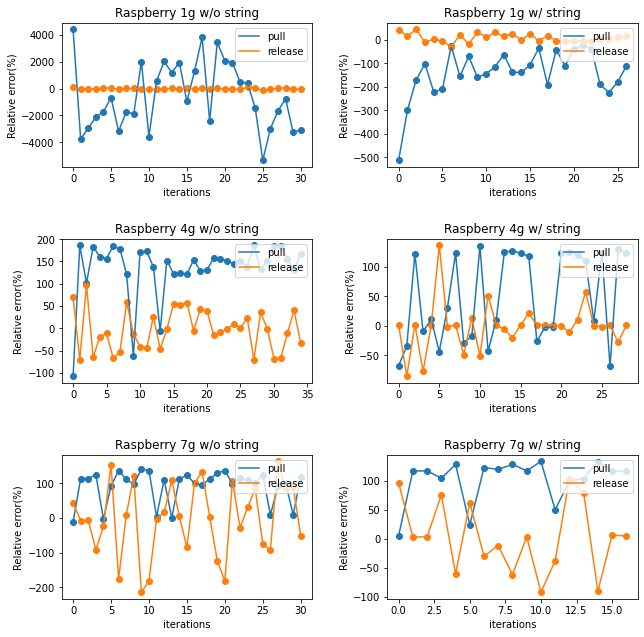

In [74]:
fig, axs = plt.subplots(3,2)
fig.set_size_inches(10,10)
k = 0
indx = [0, 1]
while k < 3:
    for j in indx:
        plot_dif0 = []
        plot_dif1 = []
        x_dif = []
        for i in range(len(error[j])):
            plot_dif0.append(error[j][i][0]*100)
            plot_dif1.append(error[j][i][1]*100)   
            x_dif.append(i)
        axs[k][j-indx[0]].scatter(x_dif, plot_dif0)
        axs[k][j-indx[0]].scatter(x_dif, plot_dif1)
        axs[k][j-indx[0]].plot(x_dif, plot_dif0,label='pull')
        axs[k][j-indx[0]].plot(x_dif, plot_dif1,label='release')
        axs[k][j-indx[0]].legend(loc="upper right")
        axs[k][j-indx[0]].set_xlabel("iterations")
        axs[k][j-indx[0]].set_ylabel('Relative error(%)')
        axs[k][j-indx[0]].set_title(new_titles[j])
    k += 1
    indx[0] = indx[0] + 2
    indx[1] = indx[1] + 2

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.5
                    )

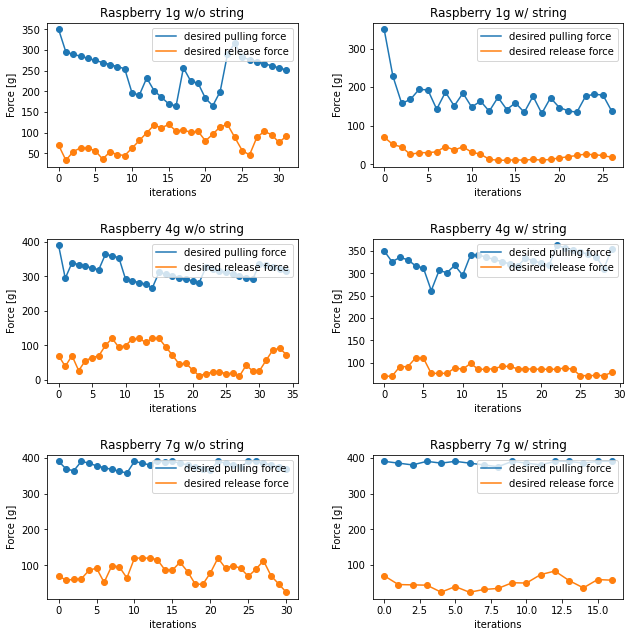

In [76]:
fig, axs = plt.subplots(3,2)
fig.set_size_inches(10,10)
k = 0
indx = [0, 1]
while k < 3:
    for j in indx:
        plot_Fd0 = []
        plot_Fd1 = []
        x_Fd = []
        for i in range(len(Fd[j])):
            plot_Fd0.append(Fd[j][i][0])
            plot_Fd1.append(Fd[j][i][1])   
            x_Fd.append(i)
        axs[k][j-indx[0]].scatter(x_Fd, plot_Fd0)
        axs[k][j-indx[0]].scatter(x_Fd, plot_Fd1)
        axs[k][j-indx[0]].plot(x_Fd, plot_Fd0,label='desired pulling force')
        axs[k][j-indx[0]].plot(x_Fd, plot_Fd1,label='desired release force')
        axs[k][j-indx[0]].legend(loc="upper right")
        axs[k][j-indx[0]].set_xlabel("iterations")
        axs[k][j-indx[0]].set_ylabel('Force [g]')
        axs[k][j-indx[0]].set_title(new_titles[j])
    k += 1
    indx[0] = indx[0] + 2
    indx[1] = indx[1] + 2

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.5
                    )